## Time Series

https://docs.nixtla.io/docs/timegpt_quickstart

https://medium.datadriveninvestor.com/time-series-forecasting-with-prophet-apis-12bc50ac4add

In [14]:
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv')
df.head(25)

,timestamp,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


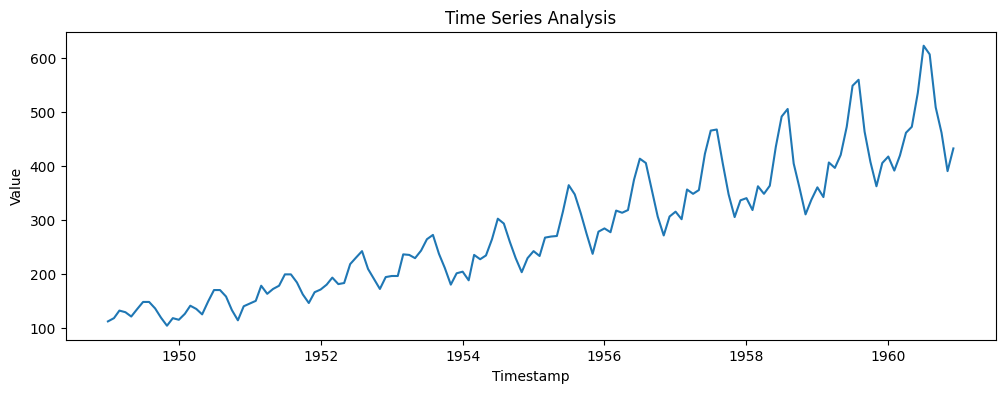

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the "timestamp" column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the "timestamp" column as the index
df.set_index('timestamp', inplace=True)

# Plot the time series data
plt.figure(figsize=(12, 4))
sns.lineplot(data=df['value'])
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Time Series Analysis')
plt.show()

_AI : now we need to predict the next possible value and plot an interval_

In [11]:
# Requerimientos
# !pip install pystan==2.19.1.1
# !pip install fbprophet

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 55.5 MB/s eta 0:00:0000:0100:01
Defaulting to user installation because normal site-packages is not writeable
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9536910 sha256=3353c9cad3d9862ad749d07a7e23a92cdc00b3465070c6ec0fa6f13119cda23a
  Stored in directory: /home/repl/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requir

Initial log joint probability = -2.46502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       401.676    0.00248368       124.119           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     171       401.829   0.000179686       90.0495    2.13e-06       0.001      250  LS failed, Hessian reset 
     199       401.842   1.21479e-06        85.393      0.5509           1      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       401.892    0.00220817       75.4865      0.5808      0.5808      419   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       401.924   0.000250229       73.0263   3.889e-06       0.001      466  LS failed, Hessian reset 
     399       401.975   6.81769e-05       84.9829           1           1      602   
    Iter      log pro

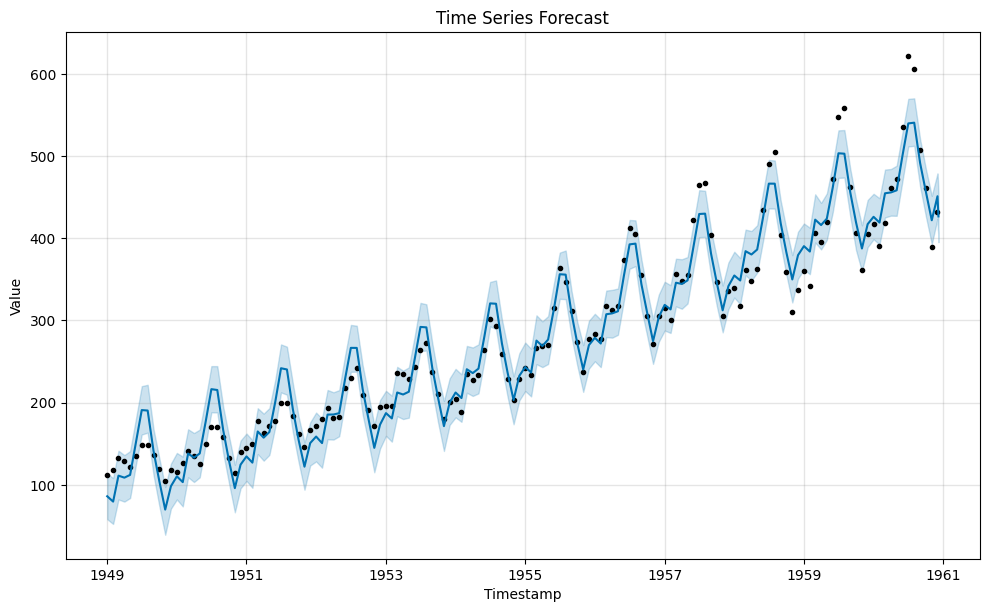

In [31]:
from fbprophet import Prophet
import matplotlib.pyplot as plt

# Reset the index of the dataframe
df.reset_index(drop=True, inplace=True)

# Rename the columns to fit Prophet's requirements
df.rename(columns={'timestamp': 'ds', 'value': 'y'}, inplace=True)

# Create a Prophet model
model = Prophet()

# Fit the model to the data
model.fit(df)

# Make future predictions
future = model.make_future_dataframe(periods=5)

# Predict the next value
forecast = model.predict(future)

# Plot the forecasted values
fig = model.plot(forecast)
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Time Series Forecast')
plt.show()

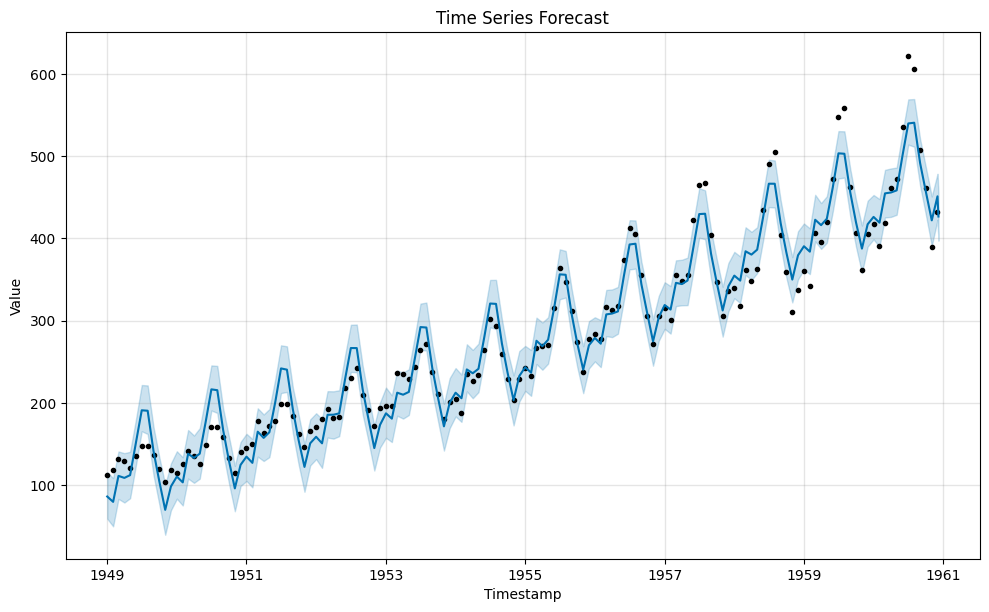

In [24]:
# Make future predictions for 5 periods ahead
future = model.make_future_dataframe(periods=5)

# Predict the next 5 values
forecast = model.predict(future)

# Plot the forecasted values for the last 100 values
model.plot(forecast)
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Time Series Forecast')
plt.show()